In [33]:
# Processing results from data collection from all datasets
# x axis = % of data collected
# y axis = % of performance achieved or MSE 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datasets = ['ml-20m-tiny', 'ml-20m-uniform', 'gl-tiny', 'gl']
dataset_titles = {'gl': 'GoogleLocal-L', 'gl-tiny': 'GoogleLocal-S', 'ml-20m-tiny': 'MovieLens-S',
                 'ml-20m-uniform': 'MovieLens-L'}
mltiny_expmt = "5_False_0.01_0.4_uniform_23300_2330_0_30_1_233000_0.5_0.5_0_0.8"
ml_expmt = "5_False_0.01_0.4_uniform_121500_30_1_1215000_12150_0_0.5_0.5_0_0.8"
gltiny_expmt = "5_False_0.01_0.4_uniform_10600_30_1_106000_1060_0_0.5_0.5_0_0.8"
gl_expmt = "5_False_0.1_0.4_uniform_290000_30_1_2900001_58000_0_0.5_0.5_0_0.8"
expmt_pairs = [('ml-20m-tiny', mltiny_expmt), ('ml-20m-uniform', ml_expmt), 
               ('gl', gl_expmt), ('gl-tiny', gltiny_expmt)]
for i, (dname, expmt) in enumerate(expmt_pairs):
    results_path = '../results/forecasting/' + dname + '/Random/' + expmt + '/'
    all_ss = np.loadtxt(results_path + 'sample_sizes')
    all_mses = np.loadtxt(results_path + 'mses')
    all_test_mses = np.loadtxt(results_path + 'test_mses')
    plt.figure(figsize=(15, 3))
    plt.plot(all_ss[0], all_mses[0])
    

OSError: ../results/forecasting/ml-20m-tiny/Random/5_False_0.01_0.4_uniform_23300_2330_0_30_1_233000_0.5_0.5_0_0.8/sample_sizes not found.

In [35]:
# ml - running earlier expmt
dname = 'ml-20m-uniform'
early_expmt = "5_False_0.0001_0.4_uniform_600_30_1_12000_30_0_0.5_0.5_0_0.8"
later_expmt = "5_False_0.1_0.4_uniform_100000_30_1_1000001_20000_0_0.5_0.5_0_0.8"
ml = (dname, early_expmt, later_expmt)

# gl - running later expmt, have to run earlier expmt
dname = 'gl'
early_expmt = "5_False_0.0001_0.4_uniform_580_30_1_5800_50_0_0.5_0.5_0_0.8"
later_expmt = "5_False_0.1_0.4_uniform_29000_30_1_290001_5800_0_0.5_0.5_0_0.8"
gl = (dname, early_expmt, later_expmt)

# # ml tiny - done
dname = 'ml-20m-tiny'
early_expmt = '5_False_0.0001_0.4_uniform_200_50_0_30_1_2000_0.5_0.5_0_0.85'
later_expmt = '5_False_0.1_0.4_uniform_21000_5250_0_30_1_213973_0.5_0.5_0_0.85'
ml_tiny = (dname, early_expmt, later_expmt)

# # gl tiny - done
dname = 'gl-tiny'
early_expmt = '5_False_0.0001_0.4_uniform_200_30_1_1000_25_0_0.5_0.5_0_0.8'
later_expmt = '5_False_0.1_0.4_item_subset_9400_30_4_94000_1880_0_0.5_0.5_0_0.8'
gl_tiny = (dname, early_expmt, later_expmt)

all_expmts = [ml, ml_tiny, gl, gl_tiny]

In [36]:
ss_mse_results = []
for dname, early_expmt, later_expmt in all_expmts:
    early_results_path = '../results/forecasting/' + dname + '/Random/' + early_expmt + '/'
    early_ss = np.loadtxt(early_results_path + 'sample_sizes')
    early_mses = np.loadtxt(early_results_path + 'mses')

    later_results_path = '../results/forecasting/' + dname + '/Random/' + later_expmt + '/'
    later_ss = np.loadtxt(later_results_path + 'sample_sizes')
    later_mses = np.loadtxt(later_results_path + 'mses')

    n_runs = 5
    all_ss = np.concatenate([early_ss[:,3:], later_ss[:]], axis=1)
    all_mse =  np.concatenate([early_mses[:,3:], later_mses[:]], axis=1)
    for i in range(n_runs):
        for ss, mse in zip(all_ss[i], all_mse[i]):
            ss_mse_results.append({'ss': ss, 'mse': mse, 'run': i, 'dataset': dname})
ss_mse_df = pd.DataFrame(ss_mse_results)


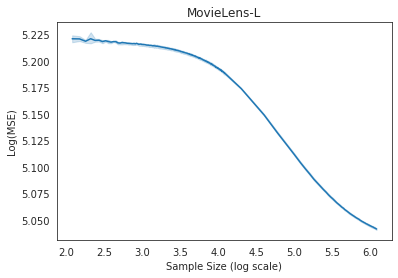

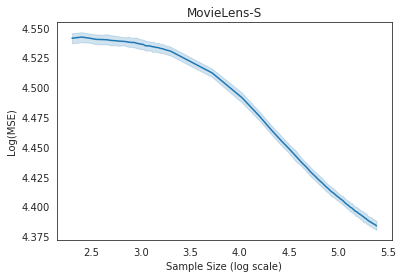

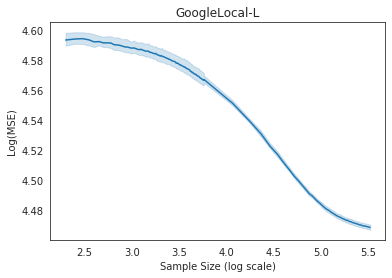

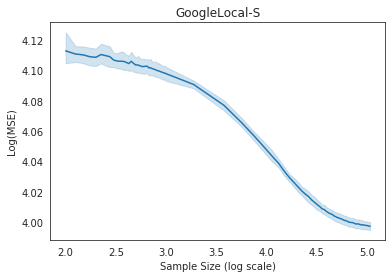

In [37]:
ss_mse_df['logss'] = np.log10(ss_mse_df['ss'])
ss_mse_df['logmse'] = np.log10(ss_mse_df['mse'])
for dname, early_expmt, later_expmt in all_expmts:
    plt.figure()
    dname_curve = ss_mse_df[ss_mse_df['dataset'] == dname]
    sns.lineplot(x='logss', y='logmse', data=dname_curve, hue='dataset', legend=None)
    plt.ylabel("Log(MSE)")
    # Fix titles here
    plt.xlabel("Sample Size (log scale)")
    plt.title(dataset_titles[dname])
    plt.savefig('../figs/' + dname + '_performance_curve')
#plt.xticks([2.0, 3.0, 4.0, 6.0], labels=["10e2", "10e3", "10e4", "10e6"])
#plt.xticks([2.0, 3.0, 4.0, 6.0], labels=["10e2", "10e3", "10e4", "10e6"])


In [11]:
sns.lineplot(x='ss', 'mse')

Index(['ss', 'mse', 'run'], dtype='object')

In [ ]:
# create piecewise function with decaying 